# Import libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [3]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score

In [4]:
# For Notebooks
init_notebook_mode(connected=True)
# For offline use
cf.go_offline()
#### used for the dynamic visualization of the plot

# Loading the data

Set index_col=0 to use the first column as the index.

In [5]:
df = pd.read_csv("diabetes.csv")

In [6]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
df['result']=df.Outcome
df.drop('Outcome',axis=1,inplace=True)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,result
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Standardize the Variables
Because the KNN classifier predicts the class of a given test observation by identifying the observations that are nearest to it, the scale of the variables matters. Any variables that are on a large scale will have a much larger effect on the distance between the observations, and hence on the KNN classifier, than variables that are on a small scale.

In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
scaler = StandardScaler()

In [10]:
scaler.fit(df.drop('result',axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [11]:
scaled_features = scaler.transform(df.drop('result',axis=1))

In [12]:
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_feat.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496


In [13]:
#df.iplot(kind='scatter',mode='markers',size=10,labels=df.Outcome)
df[['result','Glucose']].iplot(kind='scatter')

# Train Test Split

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features,df['result'],
                                                    test_size=0.30)

# DECISION Tree model

In [16]:
from sklearn.tree import DecisionTreeClassifier

In [17]:
dtree = DecisionTreeClassifier(criterion = "entropy",max_depth=4,random_state=0 )

In [18]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

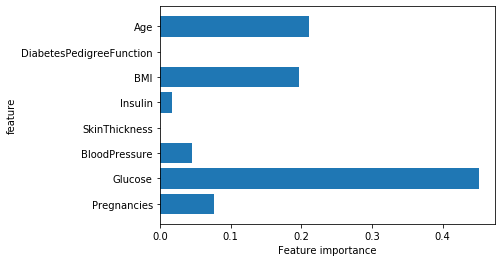

In [19]:
def plot_feature_importances_adult_census(model):
    n_features = df_feat.shape[1]
    plt.barh(range(n_features),model.feature_importances_,align='center')
    plt.yticks(np.arange(n_features),df_feat.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("feature")
    ##plt.show()
    ##fig=plt.figure()
    plt.savefig("feature_imporatnace_diabetes.png")
    plt.show()
    plt.close()
plot_feature_importances_adult_census(dtree)

we can notice that SkinThickness col is usefull so we weill delete it later

del(df_feat['SkinThickness'])
df_feat.head()

## Prediction and Evaluation

In [20]:
predictions = dtree.predict(X_test)

In [21]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.84      0.77      0.81       148
           1       0.65      0.75      0.69        83

    accuracy                           0.76       231
   macro avg       0.75      0.76      0.75       231
weighted avg       0.77      0.76      0.77       231



In [22]:
print(confusion_matrix(y_test,predictions))

[[114  34]
 [ 21  62]]


In [23]:
print('Decision Tree Classifier (Accuracy) : '+str(accuracy_score(predictions,y_test)))

Decision Tree Classifier (Accuracy) : 0.7619047619047619


In [24]:
###having a colored DT with pydot
from sklearn import tree
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydot 
from IPython.display import Image  

/opt/anaconda3/lib/python3.7/site-packages/sklearn/externals/six.py:31: DeprecationWarning:

The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).



In [25]:
features = list(df_feat)
features

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

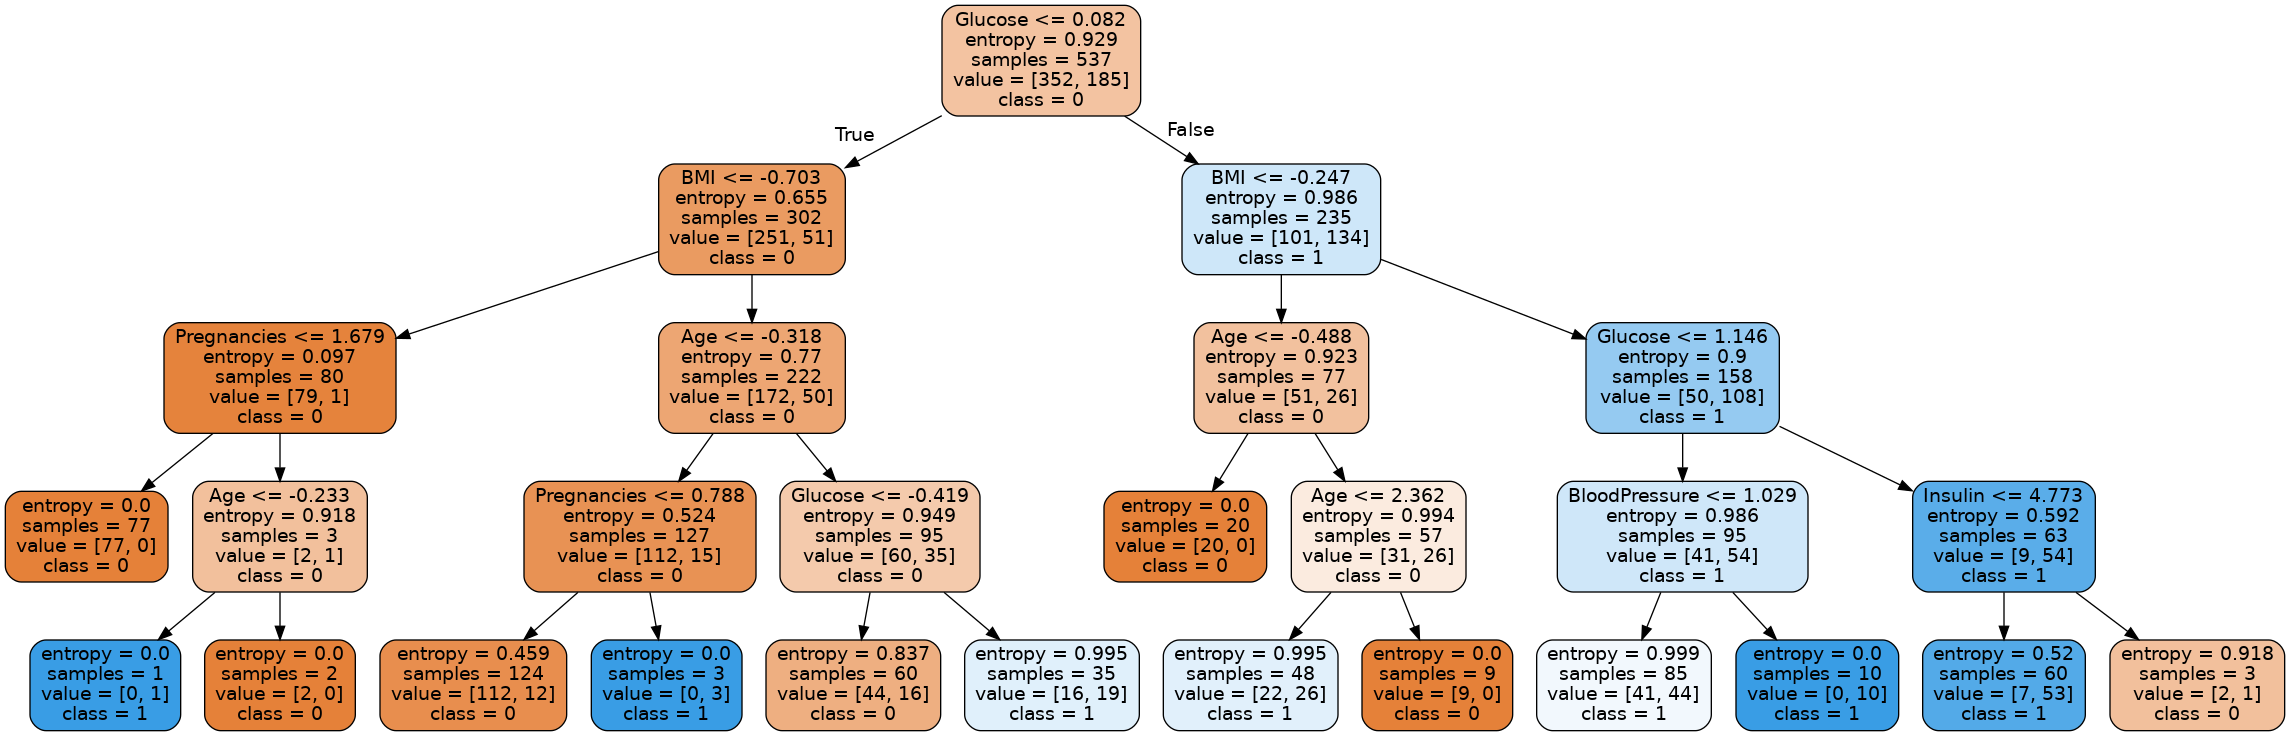

In [26]:
dot_data = StringIO()  
export_graphviz(dtree, out_file=dot_data,feature_names=features,filled=True,class_names=["0","1"],rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png()) 

# Training the Random Forest model

In [27]:
from sklearn.ensemble import RandomForestClassifier

In [28]:
rfc = RandomForestClassifier(n_estimators=200)

In [29]:
del(df_feat['SkinThickness'])
df_feat.head()

,Pregnancies,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.848324,0.149641,-0.692891,0.204013,0.468492,1.425995
1,-0.844885,-1.123396,-0.160546,-0.692891,-0.684422,-0.365061,-0.190672
2,1.233880,1.943724,-0.263941,-0.692891,-1.103255,0.604397,-0.105584
3,-0.844885,-0.998208,-0.160546,0.123302,-0.494043,-0.920763,-1.041549
4,-1.141852,0.504055,-1.504687,0.765836,1.409746,5.484909,-0.020496


In [30]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features,df['result'],
                                                    test_size=0.30)

In [31]:
rfc.fit(X_train,y_train)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [32]:
rpc_predictions = rfc.predict(X_test)

In [33]:
print(confusion_matrix(y_test,rpc_predictions))
print()
print(classification_report(y_test,rpc_predictions))

[[136  27]
 [ 22  46]]

              precision    recall  f1-score   support

           0       0.86      0.83      0.85       163
           1       0.63      0.68      0.65        68

    accuracy                           0.79       231
   macro avg       0.75      0.76      0.75       231
weighted avg       0.79      0.79      0.79       231



# Using KNN model

In [34]:
from sklearn.neighbors import KNeighborsClassifier

### Choosing a K Value fits the best

defining a method in which we visualize the error rate vs K and then using the best param from GridSearchCV we can check it through the graph

In [35]:
error_rate = []
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

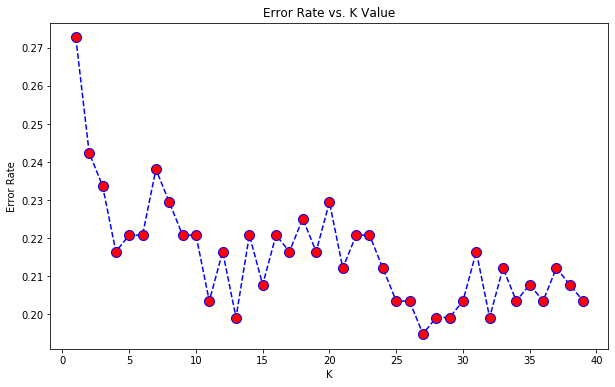

In [36]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [37]:
from sklearn.model_selection import GridSearchCV


In [38]:
parameters = {'n_neighbors':list(range(1, 40))}
model = GridSearchCV(knn, parameters,iid='False', cv=5)
model.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=39, p=2,
                                            weights='uniform'),
             iid='False', n_jobs=None,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30, ...]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [39]:
print ( model.best_params_ )

{'n_neighbors': 25}


In [40]:
nombre=model.best_params_['n_neighbors']
knn=KNeighborsClassifier(nombre)
knn.fit(X_train,y_train)
prediction=knn.predict(X_test)
print('K Nearest Neighbours with optimal C (accuracy): '+str(accuracy_score(prediction,y_test)))

K Nearest Neighbours with optimal C (accuracy): 0.7965367965367965


# Comparaison de performances de classifieurs

In [41]:
#classifiers list
classifiers = [
('KNeighbors Classifier',KNeighborsClassifier(nombre)),
              ('Decision Tree Classifier',DecisionTreeClassifier(criterion = "entropy",random_state=0)),(
'Random Forest Classifier',RandomForestClassifier(n_estimators=200))]

In [42]:
# Definition des métriques de performance
def perf_compute(clf, name):
    """
    Calculate the confusion matrix and score for each classifier
    """
    # initialize container
    perf = pd.Series(name=name)
    # We create the callables that we will pass to the profiling function
    fit = lambda: clf.fit(X_train, y_train)
    score = lambda: clf.score(X_test, y_test)

    
    # Calculeate the score in %
    perf['score'] = fit().score(X_test, y_test) * 100
    # Calculate the confusion matrix
    perf['conf_mat'] = [confusion_matrix(fit().predict(X_test), y_test)]
    
    return perf

In [43]:
#  performance calculation
perfs = pd.DataFrame([perf_compute(clf, name) for name, clf in classifiers])
perfs = perfs.sort_values('score')

perfs['score'.split()].T

,Decision Tree Classifier,Random Forest Classifier,KNeighbors Classifier
score,70.12987,78.354978,79.65368


In [44]:
def plot_conf_mat(perf, ax, title='Model'):
    """
     Confusion Matrix
    """
    sns.heatmap(perf.conf_mat[0], ax=ax, square=True, annot=True)
    ax.set_title('{}: {}\nScore: {:.2f}'.format(title, perf.name, perf.score))
    ax.set_xlabel('True label')
    ax.set_ylabel('Predicted label')

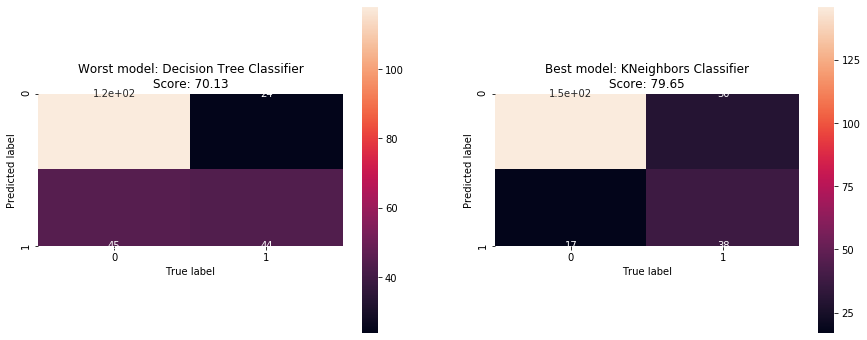

In [45]:
# Show the best and the worst classifier 
#classified by increasing scores
fig, axs = plt.subplots(ncols=2, figsize=(15, 6))
plot_conf_mat(perfs.iloc[0], ax=axs[0], title='Worst model')
plot_conf_mat(perfs.iloc[-1], ax=axs[1], title='Best model')

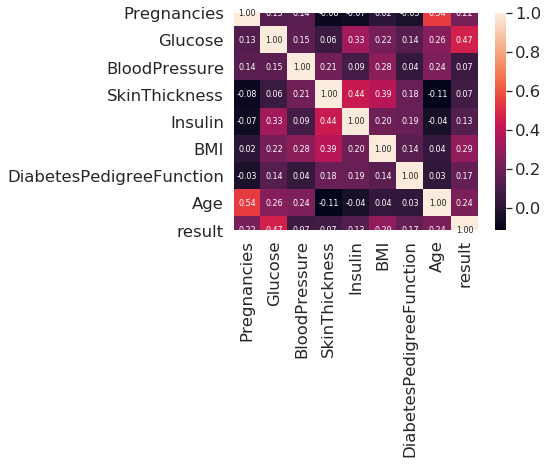

In [46]:
cols = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age', 'result']
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.5)
hm = sns.heatmap(cm,cbar=True,annot=True,square=True,fmt='.2f',annot_kws={'size': 8},yticklabels=cols,xticklabels=cols)
plt.show()